Background of the Project Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams. Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores.

    The data
The file has the following fields (source): "gender" - male / female "race/ethnicity" - one of 5 combinations of race/ethnicity "parent_education_level" - highest education level of either parent "lunch" - whether the student receives free/reduced or standard lunch "test_prep_course" - whether the student took the test preparation course "math" - exam score in math "reading" - exam score in reading "writing" - exam score in writing

Challenge Create a report to answer the principal's questions. Include:

What are the average reading scores for students with/without the test preparation course?
What are the average scores for the different parental education levels?
Create plots to visualize findings for questions 1 and 2.
[Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
[Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.
Summarize your findings.

## IMPORTING LIBRARIES AND READING  IN THE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)


sns.set_palette('hls')
%matplotlib inline

In [2]:
data = 'student data.csv'
std_perf = pd.read_csv(data)

## DATA CLEANING

In [3]:
std_perf.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
std_perf.tail()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
std_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
std_perf.describe()


,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
std_perf.isna().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

## DATA  ANALYSIS

##### QUESTION 1 : What are the average reading scores for students with/without the test preparation course? 

In [6]:
reading_avg = std_perf.groupby('test_prep_course')[['reading']].mean()
reading_avg

,reading
test_prep_course,
completed,73.893855
none,66.534268


#####  QUESTION 2:    What are the average scores for the different parental education levels?

In [7]:
#Updating the dataframe to include the sum of all the scores
std_perf['total_score'] = std_perf['reading'] + std_perf['writing'] + std_perf['math']
std_perf

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [11]:
# Finding the average scores using the total scores considering the parent's education
Par_avg_score1 = std_perf.groupby('parent_education_level')[['total_score']].mean()
Par_avg_score1

,total_score
parent_education_level,
associate's degree,208.707207
bachelor's degree,215.771186
high school,189.290816
master's degree,220.796610
some college,205.429204
some high school,195.324022


In [8]:
# FINDING THE MEAN OF EACH COURSE FOR PARENT'S EDUCATION
Par_avg_score2= std_perf.groupby('parent_education_level')[['reading','writing','math']].mean()
Par_avg_score2

,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


##### QUESTION3 : Create plots to visualize findings for questions 1 and 2. 

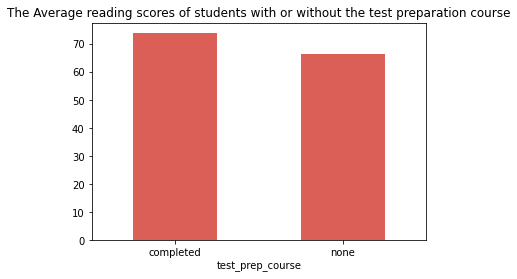

In [9]:
# Visualization 1
r =reading_avg.reading.plot(x ='test_prep_course', kind = 'bar' ,  rot = 0)
r.set(title = 'The Average reading scores of students with or without the test preparation course');


In [10]:
#Visualization 2 using the total score

x =Par_avg_score1.plot( kind = 'line',figsize=(20, 10) ,  rot = -10)
x.set(title = "The Average scores of students based on their parent's education level");
x.set_xlabel("Parent's educational levels")
x.set_ylabel("Average Scores of students")

y =Par_avg_score1.plot( kind = 'bar',figsize=(20, 10) ,  rot = 0)
y.set(title = "The Average scores of students based on their parent's education level");
y.set_xlabel("Parent's educational levels")
y.set_ylabel("Average Scores of students")

NameError: name 'Par_avg_score1' is not defined

Text(0, 0.5, 'Average Scores of students')

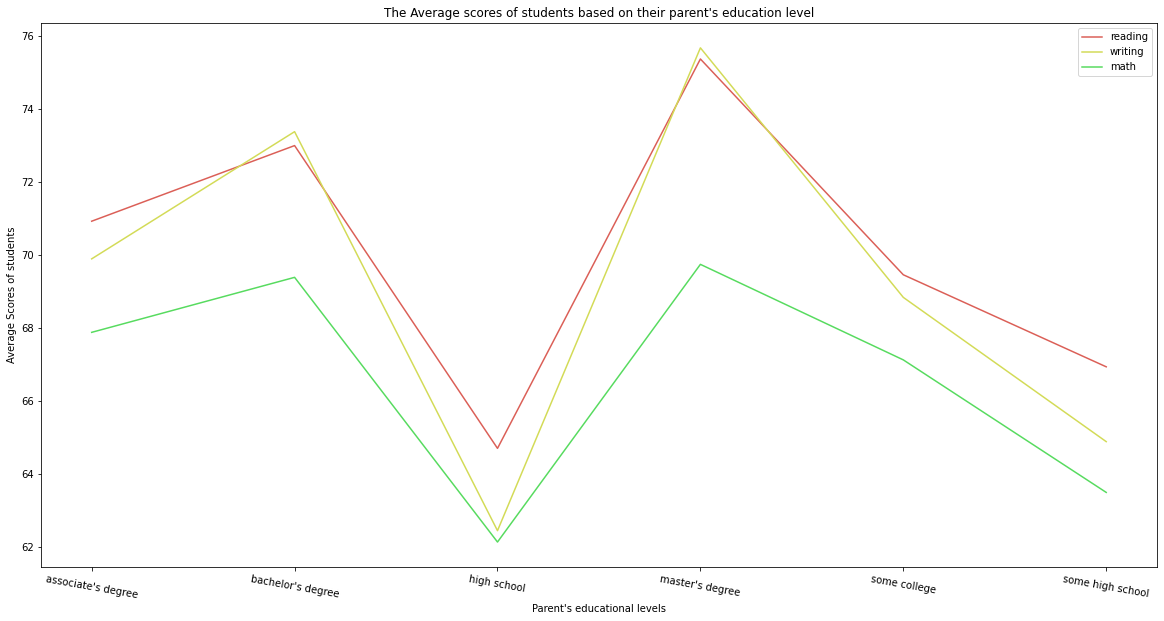

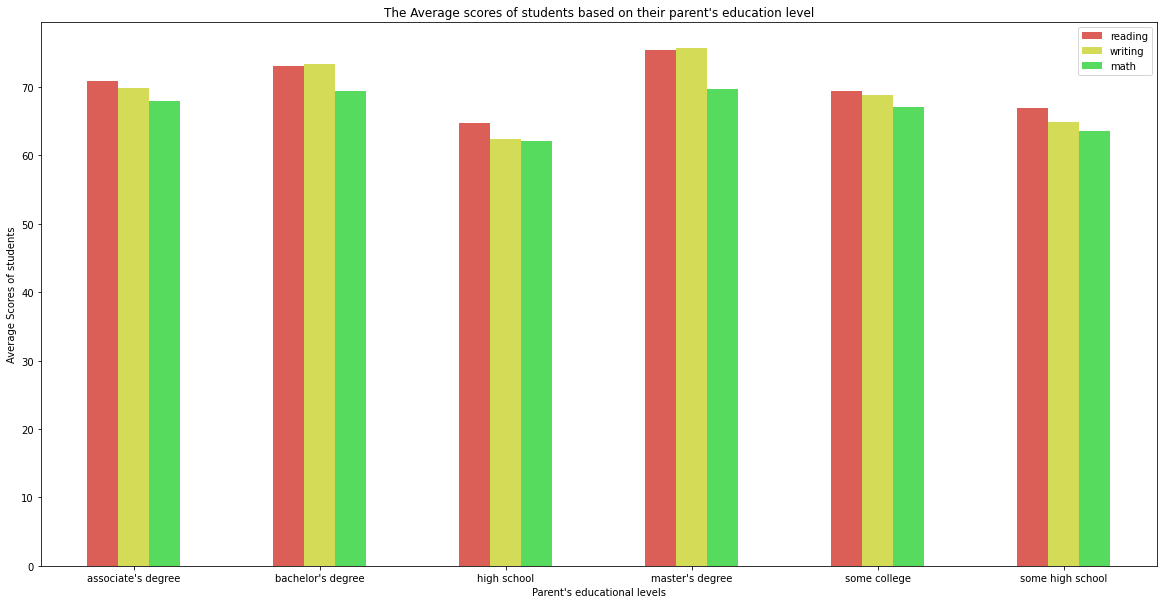

In [11]:
#Visualization 2 using the Average scores for each subjects

x =Par_avg_score2.plot( kind = 'line',figsize=(20, 10) ,  rot = -10)
x.set(title = "The Average scores of students based on their parent's education level");
x.set_xlabel("Parent's educational levels")
x.set_ylabel("Average Scores of students")

y =Par_avg_score2.plot( kind = 'bar',figsize=(20, 10) ,  rot = 0)
y.set(title = "The Average scores of students based on their parent's education level");
y.set_xlabel("Parent's educational levels")
y.set_ylabel("Average Scores of students")

#### Question4
Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots)

In [15]:
#Effect of test prep course and parent education level on the Average of the total scores of students.

overall_performance = std_perf.groupby(['test_prep_course','parent_education_level'])[['total_score']].mean().unstack()

overall_performance


total_score                                \
parent_education_level associate's degree bachelor's degree high school   
test_prep_course                                                          
completed                      224.817073        228.717391  200.892857   
none                           199.271429        207.500000  184.650000   

                                                                      
parent_education_level master's degree some college some high school  
test_prep_course                                                      
completed                   228.950000   223.961039       208.012987  
none                        216.615385   195.852349       185.745098

In [13]:
#Finding the transpose of the overall performance to have a clustered view
overall_performance2 = overall_performance.T
overall_performance2

test_prep_course                     completed        none
            parent_education_level                        
total_score associate's degree      224.817073  199.271429
            bachelor's degree       228.717391  207.500000
            high school             200.892857  184.650000
            master's degree         228.950000  216.615385
            some college            223.961039  195.852349
            some high school        208.012987  185.745098

Text(0, 0.5, 'Average Scores')

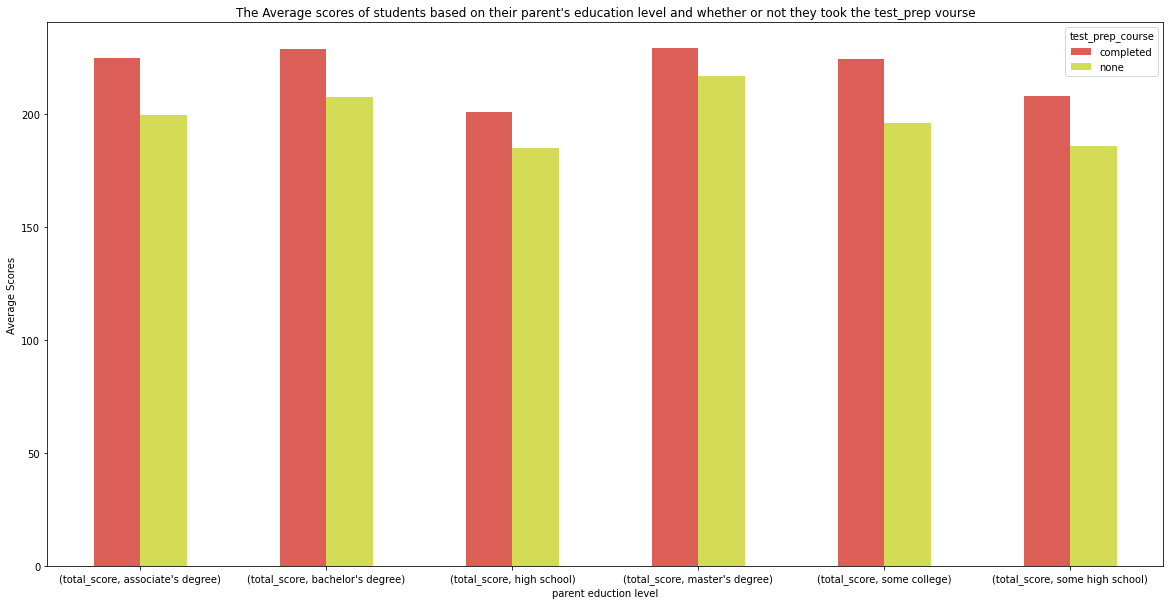

In [24]:
ax= overall_performance2.plot(kind="bar",figsize=(20, 10),rot=0)
ax.set(title = "The Average scores of students based on their parent's education level and whether or not they took the test_prep course");
ax.set_xlabel("parent eduction level")
ax.set_ylabel("Average Scores")


Text(0, 0.5, 'Average Scores')

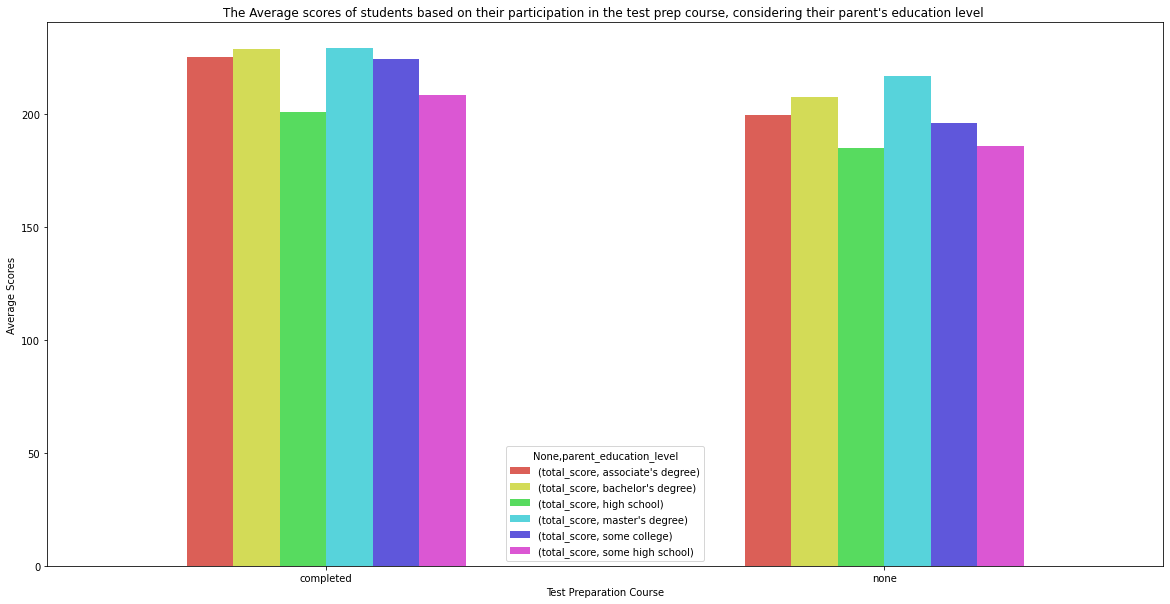

In [27]:
ay= overall_performance.plot(kind="bar",figsize=(20, 10),rot=0)
ay.set(title = "The Average scores of students based on their participation in the test prep course, considering their parent's education level ");

ay.set_xlabel("Test Preparation Course")
ay.set_ylabel("Average Scores")


In [ ]:
#CHECKING OTHER FACTORS LIKE GENDER, ETHNICITY, AND LUNCH 

In [31]:
#Gender
gender_avg_score= std_perf.groupby(['test_prep_course', 'parent_education_level', 'gender'])[['total_score']].mean().unstack().T
gender_avg_score


test_prep_course                completed                                \
parent_education_level associate's degree bachelor's degree high school   
            gender                                                        
total_score female                  231.5        234.681818  205.517241   
            male                    217.8        223.250000  195.925926   

test_prep_course                                                      \
parent_education_level master's degree some college some high school   
            gender                                                     
total_score female          233.928571   225.690476       214.257143   
            male            217.333333   221.885714       202.809524   

test_prep_course                     none                                \
parent_education_level associate's degree bachelor's degree high school   
            gender                                                        
total_score female             203.081081        218.292683  189.215385   
            male               195.000000        193.225806  180.693333   

test_prep_course                                                      
parent_education_level master's degree some college some high school  
            gender                                                    
total_score female          212.681818   206.000000       185.714286  
            male            221.705882   185.287671       185.782609

Text(0, 0.5, 'Average Scores')

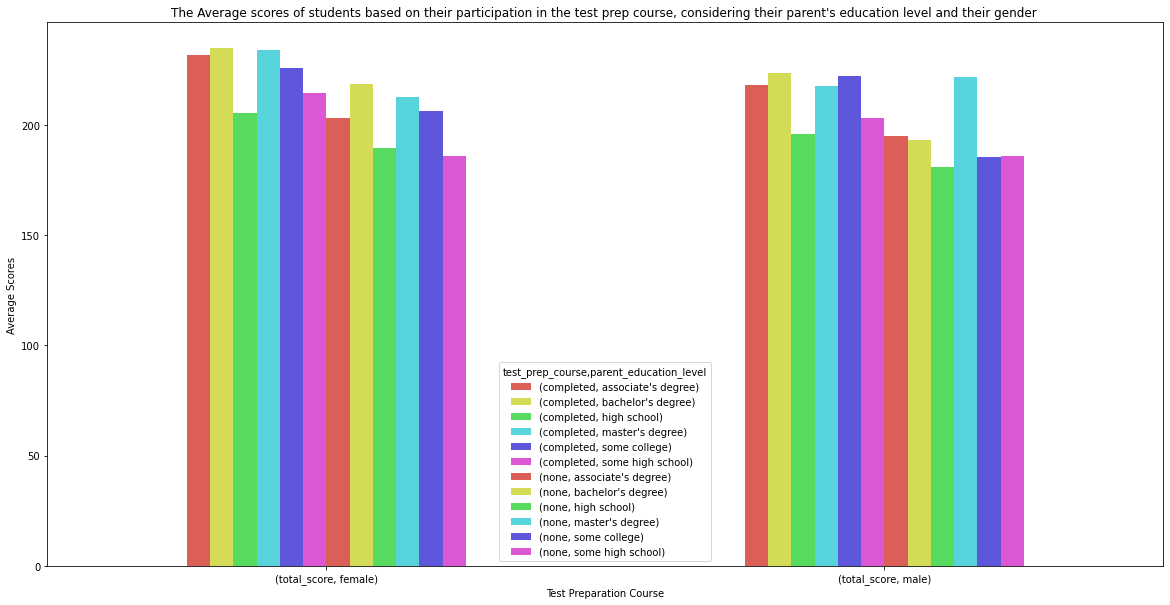

In [33]:
ag= gender_avg_score.plot(kind="bar",figsize=(20, 10),rot=0)
ag.set(title = "The Average scores of students based on their gender, considering their parent's education level and their participation in the test prep course ");

ag.set_xlabel("Gender Group")
ag.set_ylabel("Average Scores")


In [34]:

#Ethnic Group
ethnic_avg_score= std_perf.groupby(['test_prep_course', 'parent_education_level', 'race/ethnicity'])[['total_score']].mean().unstack().T
ethnic_avg_score


test_prep_course                    completed                                \
parent_education_level     associate's degree bachelor's degree high school   
            race/ethnicity                                                    
total_score group A                211.400000        214.750000  202.714286   
            group B                228.857143        237.666667  198.066667   
            group C                220.433333        230.100000  191.533333   
            group D                226.857143        215.333333  202.636364   
            group E                230.789474        240.900000  219.750000   

test_prep_course                                                          \
parent_education_level     master's degree some college some high school   
            race/ethnicity                                                 
total_score group A                    NaN   220.857143       204.375000   
            group B             221.333333   216.928571       201.157895   
            group C             216.666667   229.666667       198.409091   
            group D             231.666667   225.391304       219.578947   
            group E             287.500000   221.250000       224.777778   

test_prep_course                         none                                \
parent_education_level     associate's degree bachelor's degree high school   
            race/ethnicity                                                    
total_score group A                180.666667        198.000000  171.818182   
            group B                191.000000        209.705882  178.333333   
            group C                200.437500        209.350000  185.591837   
            group D                200.666667        206.894737  186.363636   
            group E                213.500000        209.125000  202.285714   

test_prep_course                                                          
parent_education_level     master's degree some college some high school  
            race/ethnicity                                                
total_score group A             190.000000   178.000000       167.187500  
            group B             227.666667   178.652174       184.578947  
            group C             198.500000   191.937500       182.185185  
            group D             228.647059   203.954545       197.419355  
            group E             220.500000   214.260870       191.666667

Text(0, 0.5, 'Average Scores')

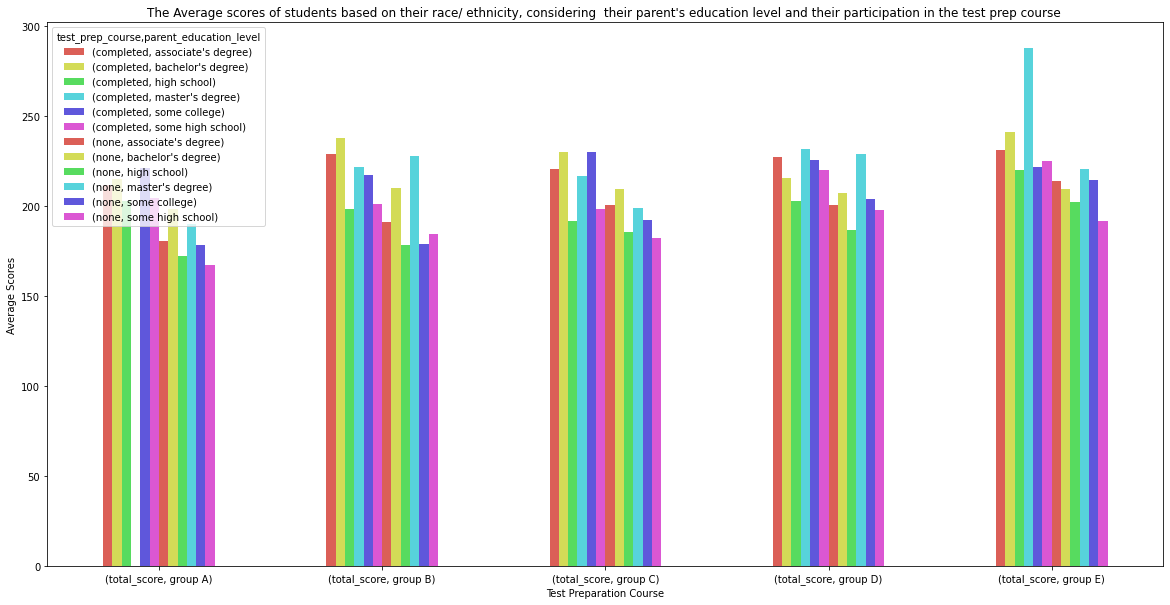

In [35]:
ar= ethnic_avg_score.plot(kind="bar",figsize=(20, 10),rot=0)
ar.set(title = "The Average scores of students based on their race/ ethnicity, considering  their parent's education level and their participation in the test prep course ");

ar.set_xlabel("Race/Ethnic Group")
ar.set_ylabel("Average Scores")


In [36]:
#Lunch
Lunch_avg_score= std_perf.groupby(['test_prep_course', 'parent_education_level', 'lunch'])[['total_score']].mean().unstack().T
Lunch_avg_score


test_prep_course                  completed                                \
parent_education_level   associate's degree bachelor's degree high school   
            lunch                                                           
total_score free/reduced         215.103448        216.294118    191.0000   
            standard             230.132075        236.000000    208.3125   

test_prep_course                                                        \
parent_education_level   master's degree some college some high school   
            lunch                                                        
total_score free/reduced      216.333333   199.076923       189.434783   
            standard          247.875000   236.647059       215.925926   

test_prep_course                       none                                \
parent_education_level   associate's degree bachelor's degree high school   
            lunch                                                           
total_score free/reduced         184.916667        191.629630  162.282609   
            standard             206.760870        217.022222  195.595745   

test_prep_course                                                        
parent_education_level   master's degree some college some high school  
            lunch                                                       
total_score free/reduced      186.333333   183.924528       160.921053  
            standard          230.074074   202.437500       200.484375

Text(0, 0.5, 'Average Scores')

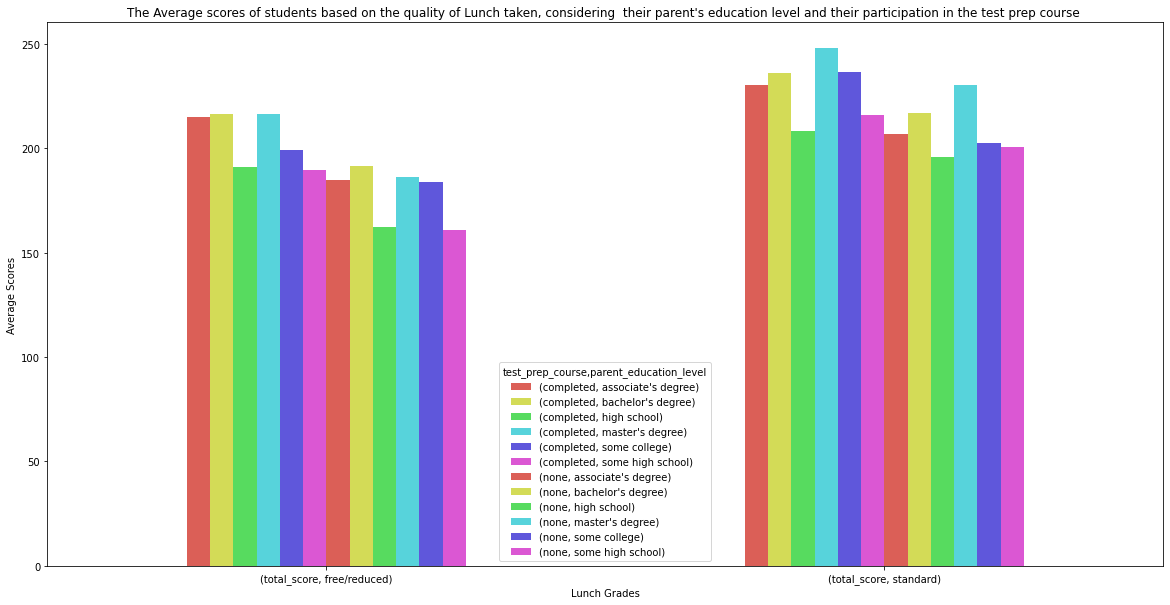

In [40]:
al= Lunch_avg_score.plot(kind="bar",figsize=(20, 10),rot=0)
al.set(title = "The Average scores of students based on the quality of Lunch taken, considering  their parent's education level and their participation in the test prep course ");

al.set_xlabel("Lunch Grades")
al.set_ylabel("Average Scores")



## QUESTION 5
The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.


In [42]:
#Cheking for the correlation of scores of students
course_scores_correlation = std_perf[['math','reading', 'writing']].corr()
course_scores_correlation


,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Correlation between the scores')

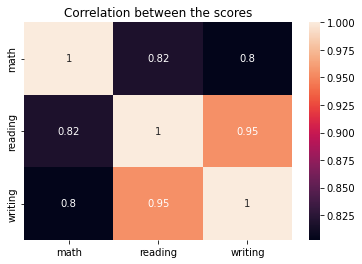

In [44]:
sns.heatmap(course_scores_correlation, annot=True)
plt.title('Correlation between the scores')


## Question 6
Summarize your findings

Our data set consist of 1000 students.They offer three courses: Maths, Writing,Reading. They come have diffent racial group, have differing gender and their parents have different educational background ranging from Master's degree to high school certificateAmong these students, the lunch they have is classified as Standard portion or reduced. In abid to prepare the student's for their exams,the school authority also organized test preparation courses to get them started.


###                   The following was found out when analyzing the data set.

1.  The average scores of the students who have completed the test preparation course is 73.89 and those who have not completed it is 66.53.The students who completed the test preparation course for reading are more than those who did not complete it.
2.  Students with parents who had a masters degree have the highest average score, while students with parents who have high school certificate only have the lowest avarage score.
3.  For students whose parents had a masters degree their highest score was in writing, followed by reading, then maths. Students whose parents had associate degree, high school, some college had high scores in reading, while students whose parents had bachelors and masters degree had high scores in writing.
4.  Generally, all the students had low scores in math. Though, we noticed students whose parents had a high school certificate had same scores in maths and writing.
5. The trend of the different segments of the parents education level are the same for those with or without test preparation.i.e students whose parents had a masters degree had the highest score for those with or without test preparation and also for the other degrees.
6. The female students whose parents had a masters degree had the highest score when considering Gender. But checking for those who took test preparation , the male students had the highest score.
7. Group E is the race with the highest exam score. Their parents had a masters degree and  they also did the test preparation course . But without test prepartion is Group B had the lead.  Group A doesn't have students whose parents had a masters where they had the test preparation.
8. Students who received standard lunch arehigher in number than those who recieved free/reduced lunch for the category of students whose parents had a masters with/without test preparation. Also,their lunch had an effect on their grades.
- Their Maths, Writing and Reading  Scores are all positively and highly correlated and they all vary in the same direction.
